# MED-PC Data Processing Notebook

## Importing the Python Libraries

In [1]:
import sys
import glob
from collections import defaultdict
import os

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import sem
import matplotlib.pyplot as plt
from medpc2excel.medpc_read import medpc_read
import matplotlib

In [3]:
# setting path
sys.path.append('../../src')

In [4]:
# All the libraries that were created for this repository
import extract.dataframe
import processing.tone
import processing.port
import extract.metadata

In [5]:
# Increase size of plot in jupyter

plt.rcParams["figure.figsize"] = (13.5,7.5)

In [6]:
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})

# Loading in Recording and Metadata from Previous Notebook

In [7]:
min_number_of_sessions = 8

In [8]:
all_pilots_port_entry_every_increment_probability_files = glob.glob("./**/port_entry_every_increment_probability*.pkl", recursive=True)

In [9]:
all_pilots_port_entry_every_increment_probability_df = pd.concat([pd.read_pickle(file_path) for file_path in all_pilots_port_entry_every_increment_probability_files])

In [10]:
columns_to_keep = []
for col in all_pilots_port_entry_every_increment_probability_df.columns:
    if type(col) == str:
        columns_to_keep.append(col)
    elif type(col) == int:
        if col <= min_number_of_sessions:
            columns_to_keep.append(col)

In [11]:
all_pilots_port_entry_every_increment_probability_df = all_pilots_port_entry_every_increment_probability_df[columns_to_keep]

In [12]:
all_pilots_port_entry_every_increment_probability_df.head()

,index,2,8,6,4,7,1,5,3,cage,strain,cohort
0,2.1,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.20512820512820512, 0.20512820512820512, 0.2...","[0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.0...","[0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2, 0.2, 0.2, 0.175, 0.175, 0.175, 0.175, 0....","[0.0975609756097561, 0.0975609756097561, 0.097...",2,C57,pilot_1
1,3.1 (1),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.4878048780487805, 0.4878048780487805, 0.487...","[0.10256410256410256, 0.10256410256410256, 0.1...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.225, 0.225, 0...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1...",4,CD1,pilot_1
2,1.4,"[0.024390243902439025, 0.024390243902439025, 0...","[0.5, 0.5, 0.525, 0.525, 0.525, 0.525, 0.525, ...","[0.20512820512820512, 0.20512820512820512, 0.2...","[0.0975609756097561, 0.0975609756097561, 0.097...","[0.375, 0.4, 0.425, 0.425, 0.425, 0.425, 0.425...","[0.06666666666666667, 0.06666666666666667, 0.0...","[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,C57,pilot_1
3,3.4 (2),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.36585365853658536, 0.36585365853658536, 0.3...","[0.23076923076923078, 0.23076923076923078, 0.2...","[0.125, 0.125, 0.125, 0.125, 0.15, 0.15, 0.15,...","[0.4, 0.4, 0.375, 0.375, 0.375, 0.375, 0.375, ...","[0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.0...","[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.0...","[0.225, 0.2, 0.15, 0.15, 0.15, 0.175, 0.175, 0...",4,CD1,pilot_1
4,4.3 (3),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.2682926829268293, 0.2682926829268293, 0.268...","[0.358974358974359, 0.358974358974359, 0.35897...","[0.25, 0.25, 0.275, 0.275, 0.275, 0.3, 0.3, 0....","[0.275, 0.275, 0.275, 0.25, 0.25, 0.25, 0.25, ...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...","[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ...","[0.225, 0.225, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0...",4,CD1,pilot_1


In [13]:
all_pilots_subject_and_date_rows_licking_specifity_files = glob.glob("./**/subject_and_date_rows_licking_specifity*.csv", recursive=True)

In [14]:
all_pilots_subject_and_date_rows_licking_specifity_files

['./pilot_1/proc/subject_and_date_rows_licking_specifity/pilot_1_cage_1_2_3_4_date_20220503_20220517/subject_and_date_rows_licking_specifity_pilot_1_cage_1_2_3_4_date_20220503_20220517.csv',
 './pilot_2/proc/subject_and_date_rows_licking_specifity/pilot_2_cage_1_2_3_4_5_6_date_20220718_20220727/subject_and_date_rows_licking_specifity_pilot_2_cage_1_2_3_4_5_6_date_20220718_20220727.csv',
 './pilot_3/proc/subject_and_date_rows_licking_specifity/pilot_3_cage_1_2_3_4_5_6_date_20220920_20220927/subject_and_date_rows_licking_specifity_pilot_3_cage_1_2_3_4_5_6_date_20220920_20220927.csv']

In [15]:
all_pilots_subject_and_date_rows_licking_specifity_df = pd.concat([pd.read_csv(file_path, index_col=0) for file_path in all_pilots_subject_and_date_rows_licking_specifity_files])

In [16]:
all_pilots_subject_and_date_rows_licking_specifity_df = all_pilots_subject_and_date_rows_licking_specifity_df[all_pilots_subject_and_date_rows_licking_specifity_df["date_int"] <= min_number_of_sessions]


In [17]:
all_pilots_subject_and_date_rows_licking_specifity_df.head()

,subject,date,-20_to_0,0_to_10,date_int,cage,strain,cohort
0,1.1,1,0.030167,0.078200,1,1,C57,pilot_1
1,1.1,2,0.104817,0.292439,2,1,C57,pilot_1
2,1.1,3,0.156837,0.263550,3,1,C57,pilot_1
3,1.1,4,0.283366,0.632512,4,1,C57,pilot_1
4,1.1,5,0.269788,0.755350,5,1,C57,pilot_1


## Getting the averages across all the animals per strain

- We will plot a line for each subject. With the X-axis being the days since the first session. And the Y-axis is the latency values averaged across all the trials for one recording session
- Grouping all the rows with the same subject and date(aka, all the trials in one session). And then getting the mean for each value

- Filtering for C57 and CD1

In [18]:
c57_port_entry_every_increment_probability_df = all_pilots_port_entry_every_increment_probability_df[all_pilots_port_entry_every_increment_probability_df["strain"] == "C57"]
cd1_port_entry_every_increment_probability_df = all_pilots_port_entry_every_increment_probability_df[all_pilots_port_entry_every_increment_probability_df["strain"] == "CD1"]

In [19]:
c57_col_to_increment_probability = defaultdict(dict)
for col in c57_port_entry_every_increment_probability_df.columns:
    if type(col) is int:
        c57_col_to_increment_probability[col]["all"] = c57_port_entry_every_increment_probability_df[col].tolist()
        c57_col_to_increment_probability[col]["all"] = [array for array in c57_col_to_increment_probability[col]["all"] if type(array) == np.ndarray]
        c57_col_to_increment_probability[col]["mean"] = np.array(c57_col_to_increment_probability[col]["all"]).mean(axis=0)
        c57_col_to_increment_probability[col]["sem"] = np.array(c57_col_to_increment_probability[col]["all"]).std(axis=0) / ((np.array(c57_col_to_increment_probability[col]["all"]).shape[0]) ** 0.5)

In [20]:
cd1_col_to_increment_probability = defaultdict(dict)
for col in cd1_port_entry_every_increment_probability_df.columns:
    if type(col) is int:
        cd1_col_to_increment_probability[col]["all"] = cd1_port_entry_every_increment_probability_df[col].tolist()
        cd1_col_to_increment_probability[col]["all"] = [array for array in cd1_col_to_increment_probability[col]["all"] if type(array) == np.ndarray]
        cd1_col_to_increment_probability[col]["mean"] = np.array(cd1_col_to_increment_probability[col]["all"]).mean(axis=0)
        cd1_col_to_increment_probability[col]["sem"] = np.array(cd1_col_to_increment_probability[col]["all"]).std(axis=0) / ((np.array(cd1_col_to_increment_probability[col]["all"]).shape[0]) ** 0.5)

- Checking if standard error is correctly calculated

In [21]:
np.array(cd1_col_to_increment_probability[1]["all"])

array([[0.175     , 0.175     , 0.175     , ..., 0.65      , 0.65      ,
        0.675     ],
       [0.075     , 0.075     , 0.075     , ..., 0.2       , 0.2       ,
        0.2       ],
       [0.175     , 0.175     , 0.175     , ..., 0.35      , 0.35      ,
        0.35      ],
       ...,
       [0.05128205, 0.05128205, 0.05128205, ..., 0.07692308, 0.07692308,
        0.07692308],
       [0.1025641 , 0.1025641 , 0.1025641 , ..., 0.15384615, 0.15384615,
        0.15384615],
       [0.02564103, 0.02564103, 0.02564103, ..., 0.        , 0.        ,
        0.        ]])

In [22]:
np.array(cd1_col_to_increment_probability[1]["sem"])

array([0.00991801, 0.00991801, 0.00991801, ..., 0.02505156, 0.02501987,
       0.02520788])

In [23]:
sem(np.array(cd1_col_to_increment_probability[1]["all"])[:, 0])

0.010076706712627632

In [24]:
per_strain_output_directory = "./proc/plots/per_strain_plots/"

In [25]:
per_strain_output_directory

'./proc/plots/per_strain_plots/'

In [26]:
os.makedirs(per_strain_output_directory, exist_ok=True)

- Plotting the probability inside the port

In [27]:
all_colors = ["#73a0a9", "#5c8891", "#45717a", "#2e5b64", "#17464e", "#003239", "#001f26", "#000000"]

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


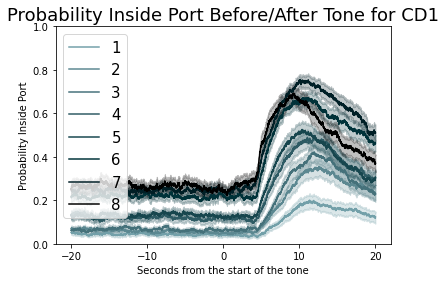

In [28]:
# all_colors = ["k", "gray", "b", "m", "fuchsia", "c","g", "lime", "y", "darkorange", "r", "deeppink"]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13.5,7.5)
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})

ax.set_xlabel("Seconds from the start of the tone", family="Arial")
ax.set_ylabel("Probability Inside Port", family="Arial")
ax.set_title("Probability Inside Port Before/After Tone for CD1", family="Arial")
counter = 0

for key in sorted(cd1_col_to_increment_probability.keys()):
    ax.plot(np.linspace(-20,20,4000), cd1_col_to_increment_probability[key]["mean"], label=int(key), color=all_colors[counter])
    ax.fill_between(np.linspace(-20,20,4000), cd1_col_to_increment_probability[key]["mean"]-cd1_col_to_increment_probability[key]["sem"], \
                    cd1_col_to_increment_probability[key]["mean"]+cd1_col_to_increment_probability[key]["sem"], \
                   alpha=.25, color=all_colors[counter])
    counter += 1

ax.set_ylim(0, 1)
ax.legend(loc="upper left")

file_name = "probability_inside_port_CD1.svg"
plt.savefig(os.path.join(per_strain_output_directory, file_name))
file_name = "probability_inside_port_CD1.png"
plt.savefig(os.path.join(per_strain_output_directory, file_name))
plt.show()


In [29]:
all_colors = ["#ffcf66", "#daae46", "#b68d24", "#936f00", "#705100", "#513500", "#391b00", "#000000"]

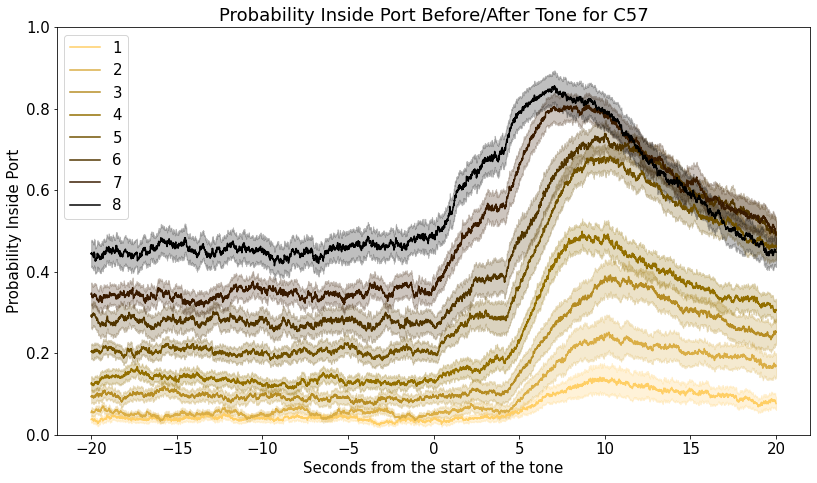

In [30]:
# all_colors = ["k", "gray", "b", "m", "fuchsia", "c","g", "lime", "y", "darkorange", "r", "deeppink"]
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13.5,7.5)
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})

ax.set_xlabel("Seconds from the start of the tone", family="Arial")
ax.set_ylabel("Probability Inside Port", family="Arial")
ax.set_title("Probability Inside Port Before/After Tone for C57", family="Arial")
counter = 0

for key in sorted(c57_col_to_increment_probability.keys()):
    ax.plot(np.linspace(-20,20,4000), c57_col_to_increment_probability[key]["mean"], label=int(key), color=all_colors[counter])
    ax.fill_between(np.linspace(-20,20,4000), c57_col_to_increment_probability[key]["mean"]-c57_col_to_increment_probability[key]["sem"], \
                    c57_col_to_increment_probability[key]["mean"]+c57_col_to_increment_probability[key]["sem"], \
                   alpha=.25, color=all_colors[counter])
    counter += 1

ax.set_ylim(0, 1)
ax.legend(loc="upper left")
file_name = "probability_inside_port_C57.svg"
plt.savefig(os.path.join(per_strain_output_directory, file_name))
file_name = "probability_inside_port_C57.png"
plt.savefig(os.path.join(per_strain_output_directory, file_name))
plt.show()

- Licking Specificity

In [31]:
all_pilots_subject_and_date_rows_licking_specifity_df.head()

,subject,date,-20_to_0,0_to_10,date_int,cage,strain,cohort
0,1.1,1,0.030167,0.078200,1,1,C57,pilot_1
1,1.1,2,0.104817,0.292439,2,1,C57,pilot_1
2,1.1,3,0.156837,0.263550,3,1,C57,pilot_1
3,1.1,4,0.283366,0.632512,4,1,C57,pilot_1
4,1.1,5,0.269788,0.755350,5,1,C57,pilot_1


In [32]:
strain_mean_licking_specifity_df = all_pilots_subject_and_date_rows_licking_specifity_df.groupby(by=["strain", "date_int"]).mean().reset_index()
strain_sem_licking_specifity_df = all_pilots_subject_and_date_rows_licking_specifity_df.groupby(by=["strain", "date_int"]).sem().reset_index()

In [33]:
min_number_of_sessions = strain_mean_licking_specifity_df.groupby(["strain"]).max()["date_int"].min()

In [34]:
strain_mean_licking_specifity_df = strain_mean_licking_specifity_df[strain_mean_licking_specifity_df["date_int"] <= min_number_of_sessions]
strain_sem_licking_specifity_df = strain_sem_licking_specifity_df[strain_sem_licking_specifity_df["date_int"] <= min_number_of_sessions]

In [35]:
strain_mean_licking_specifity_df.head()

,strain,date_int,date,-20_to_0,0_to_10,cage
0,C57,1,1.0,0.039411,0.072901,1.875
1,C57,2,2.0,0.052576,0.119948,2.000
2,C57,3,3.0,0.092986,0.191095,1.875
3,C57,4,4.0,0.134434,0.290612,1.875
4,C57,5,5.0,0.204519,0.421805,1.875


In [36]:
strain_to_time_to_color = defaultdict(dict)

In [37]:
strain_to_color = {"CD1": "#15616f", "C57": "#ffaf00"}

In [38]:
strain_to_time_to_color["CD1"]["-20_to_0"] = "#73a0a9"
strain_to_time_to_color["C57"]["-20_to_0"] = "#ffcf66"
strain_to_time_to_color["CD1"]["0_to_10"] = "#15616f"
strain_to_time_to_color["C57"]["0_to_10"] = "#ffaf00"


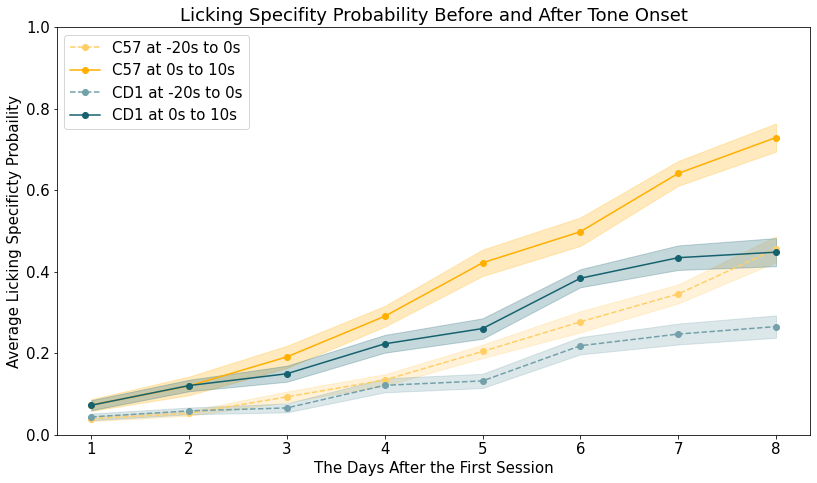

In [39]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (13.5,7.5)
plt.rcParams.update({'font.size': 15, 'font.family': ["Arial"]})

counter = 0
for strain in strain_mean_licking_specifity_df["strain"].unique():
    mean_strain_df = strain_mean_licking_specifity_df[strain_mean_licking_specifity_df["strain"] == strain]
    sem_strain_df = strain_sem_licking_specifity_df[strain_sem_licking_specifity_df["strain"] == strain]

    ax.plot(mean_strain_df["date_int"], mean_strain_df["-20_to_0"], '--o', color=strain_to_time_to_color[strain]["-20_to_0"], label="{} at -20s to 0s".format(strain))
    ax.plot(mean_strain_df["date_int"], mean_strain_df["0_to_10"], '-o', color=strain_to_time_to_color[strain]["0_to_10"], label="{} at 0s to 10s".format(strain))
    
    ax.fill_between(mean_strain_df["date_int"], mean_strain_df["-20_to_0"]-sem_strain_df["-20_to_0"], \
                    mean_strain_df["-20_to_0"]+sem_strain_df["-20_to_0"], \
                   alpha=.25, color=strain_to_time_to_color[strain]["-20_to_0"])
    ax.fill_between(mean_strain_df["date_int"], mean_strain_df["0_to_10"]-sem_strain_df["0_to_10"], \
                    mean_strain_df["0_to_10"]+sem_strain_df["0_to_10"], \
                   alpha=.25, color=strain_to_time_to_color[strain]["0_to_10"])
    
ax.set_xlabel("The Days After the First Session", family="Arial")
ax.set_ylabel("Average Licking Specificty Probaility", family="Arial")
ax.set_title("Licking Specifity Probability Before and After Tone Onset", family="Arial")

ax.set_ylim(0, 1)

ax.legend(loc="upper left")

file_name = "licking_specifity_plot_C57_CD1.svg"
plt.savefig(os.path.join(per_strain_output_directory, file_name))
plt.show()

## Saving the dataframes for analysis

#### Licking Specifity

In [40]:
all_pilots_subject_and_date_rows_licking_specifity_df = all_pilots_subject_and_date_rows_licking_specifity_df.sort_values(["cohort", "cage", "subject", "date_int"])

In [41]:
all_pilots_subject_and_date_rows_licking_specifity_df.head()

,subject,date,-20_to_0,0_to_10,date_int,cage,strain,cohort
0,1.1,1,0.030167,0.078200,1,1,C57,pilot_1
1,1.1,2,0.104817,0.292439,2,1,C57,pilot_1
2,1.1,3,0.156837,0.263550,3,1,C57,pilot_1
3,1.1,4,0.283366,0.632512,4,1,C57,pilot_1
4,1.1,5,0.269788,0.755350,5,1,C57,pilot_1


In [42]:
all_pilots_subject_and_date_rows_licking_specifity_df.tail()

,subject,date,-20_to_0,0_to_10,date_int,cage,strain,cohort
187,6.4,4,0.007551,0.028205,4,6,CD1,pilot_3
188,6.4,5,0.012026,0.116154,5,6,CD1,pilot_3
189,6.4,6,0.250782,0.348308,6,6,CD1,pilot_3
190,6.4,7,0.322449,0.534462,7,6,CD1,pilot_3
191,6.4,8,0.318679,0.518051,8,6,CD1,pilot_3


In [43]:
all_pilots_subject_and_date_rows_licking_specifity_df.to_csv("./proc/reward_training_all_pilots_per_subject_licking_specifity.csv")

In [44]:
all_pilots_port_entry_every_increment_probability_df

,index,2,8,6,4,7,1,5,3,cage,strain,cohort
0,2.1,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.2...","[0.20512820512820512, 0.20512820512820512, 0.2...","[0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.0...","[0.225, 0.225, 0.225, 0.225, 0.225, 0.225, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2, 0.2, 0.2, 0.175, 0.175, 0.175, 0.175, 0....","[0.0975609756097561, 0.0975609756097561, 0.097...",2,C57,pilot_1
1,3.1 (1),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.4878048780487805, 0.4878048780487805, 0.487...","[0.10256410256410256, 0.10256410256410256, 0.1...","[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.225, 0.225, 0...","[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.1...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1...","[0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.1...",4,CD1,pilot_1
2,1.4,"[0.024390243902439025, 0.024390243902439025, 0...","[0.5, 0.5, 0.525, 0.525, 0.525, 0.525, 0.525, ...","[0.20512820512820512, 0.20512820512820512, 0.2...","[0.0975609756097561, 0.0975609756097561, 0.097...","[0.375, 0.4, 0.425, 0.425, 0.425, 0.425, 0.425...","[0.06666666666666667, 0.06666666666666667, 0.0...","[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.275...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,C57,pilot_1
3,3.4 (2),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.36585365853658536, 0.36585365853658536, 0.3...","[0.23076923076923078, 0.23076923076923078, 0.2...","[0.125, 0.125, 0.125, 0.125, 0.15, 0.15, 0.15,...","[0.4, 0.4, 0.375, 0.375, 0.375, 0.375, 0.375, ...","[0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.0...","[0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.0...","[0.225, 0.2, 0.15, 0.15, 0.15, 0.175, 0.175, 0...",4,CD1,pilot_1
4,4.3 (3),"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.2682926829268293, 0.2682926829268293, 0.268...","[0.358974358974359, 0.358974358974359, 0.35897...","[0.25, 0.25, 0.275, 0.275, 0.275, 0.3, 0.3, 0....","[0.275, 0.275, 0.275, 0.25, 0.25, 0.25, 0.25, ...","[0.175, 0.175, 0.175, 0.175, 0.175, 0.175, 0.1...","[0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, ...","[0.225, 0.225, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0...",4,CD1,pilot_1
...,...,...,...,...,...,...,...,...,...,...,...,...
19,5.4,"[0.20512820512820512, 0.20512820512820512, 0.2...","[0.5897435897435898, 0.5897435897435898, 0.589...","[0.23076923076923078, 0.23076923076923078, 0.2...","[0.10256410256410256, 0.10256410256410256, 0.1...","[0.4358974358974359, 0.4358974358974359, 0.435...","[0.05128205128205128, 0.05128205128205128, 0.0...","[0.23076923076923078, 0.20512820512820512, 0.2...","[0.05128205128205128, 0.05128205128205128, 0.0...",5,CD1,pilot_3
20,3.1,"[0.02564102564102564, 0.02564102564102564, 0.0...","[0.48717948717948717, 0.5128205128205128, 0.51...","[0.38461538461538464, 0.38461538461538464, 0.3...","[0.10256410256410256, 0.10256410256410256, 0.1...","[0.38461538461538464, 0.38461538461538464, 0.3...","[0.02564102564102564, 0.02564102564102564, 0.0...","[0.07692307692307693, 0.10256410256410256, 0.1...","[0.07692307692307693, 0.07692307692307693, 0.0...",3,C57,pilot_3
21,4.2,"[0.05128205128205128, 0.05128205128205128, 0.0...","[0.358974358974359, 0.38461538461538464, 0.410...","[0.358974358974359, 0.358974358974359, 0.35897...","[0.05128205128205128, 0.05128205128205128, 0.0...","[0.5384615384615384, 0.5384615384615384, 0.538...","[0.10256410256410256, 0.10256410256410256, 0.1...","[0.15384615384615385, 0.15384615384615385, 0.1...","[0.07692307692307693, 0.07692307692307693, 0.0...",4,CD1,pilot_3
22,3.4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5128205128205128, 0.5128205128205128, 0.538...","[0.15384615384615385, 0.15384615384615385, 0.1...","[0.1282051282051282, 0.1282051282051282, 0.128...","[0.23076923076923078, 0.23076923076923078, 0.2...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.15384615384615385, 0.15384615384615385, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [45]:
columns_to_keep = [col for col in all_pilots_port_entry_every_increment_probability_df.columns if type(col) == str]

In [46]:
melted_port_entry_every_increment_probability_df = all_pilots_port_entry_every_increment_probability_df.melt(id_vars=columns_to_keep, var_name='session', value_name='port_entry_probability')

In [47]:
melted_port_entry_every_increment_probability_df

,index,cage,strain,cohort,session,port_entry_probability
0,2.1,2,C57,pilot_1,2,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0..."
1,3.1 (1),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1..."
2,1.4,1,C57,pilot_1,2,"[0.024390243902439025, 0.024390243902439025, 0..."
3,3.4 (2),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1..."
4,4.3 (3),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1..."
...,...,...,...,...,...,...
507,5.4,5,CD1,pilot_3,3,"[0.05128205128205128, 0.05128205128205128, 0.0..."
508,3.1,3,C57,pilot_3,3,"[0.07692307692307693, 0.07692307692307693, 0.0..."
509,4.2,4,CD1,pilot_3,3,"[0.07692307692307693, 0.07692307692307693, 0.0..."
510,3.4,3,C57,pilot_3,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


- 1 second increments

- Dividing the list into 40 parts(1 for each second, 100 for every part)

In [48]:
np.array_split(melted_port_entry_every_increment_probability_df["port_entry_probability"][0], 40)[0]

array([0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.025, 0.025,
       0.025, 0.025, 0.025, 0.025, 0.025, 0.05 , 0.05 , 0.05 , 0.05 ,
       0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.05 , 0.075, 0.075,
       0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.075, 0.1  , 0.125,
       0.15 , 0.125, 0.125, 0.125, 0.125, 0.125, 0.15 , 0.15 , 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.15 , 0.125, 0.125,
       0.125, 0.125, 0.125, 0.125, 0.125, 0.15 , 0.15 , 0.15 , 0.125,
       0.15 , 0.15 , 0.15 , 0.125, 0.15 , 0.15 , 0.175, 0.15 , 0.15 ,
       0.15 , 0.15 , 0.125, 0.125, 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
       0.1  , 0.1  , 0.125, 0.15 , 0.15 , 0.1  , 0.1  , 0.1  , 0.1  ,
       0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  , 0.1  ,
       0.1  ])

- Getting the mean from each part

In [49]:
np.column_stack(np.array_split(melted_port_entry_every_increment_probability_df["port_entry_probability"][0], 40)).T.mean(axis=1)

array([0.0995 , 0.09775, 0.09925, 0.118  , 0.09525, 0.07   , 0.09025,
       0.0895 , 0.05975, 0.04575, 0.0845 , 0.091  , 0.09275, 0.09875,
       0.07   , 0.08475, 0.1125 , 0.07725, 0.10175, 0.0985 , 0.0875 ,
       0.08175, 0.10675, 0.10075, 0.125  , 0.26975, 0.3795 , 0.51   ,
       0.58975, 0.6235 , 0.6695 , 0.6515 , 0.62975, 0.66875, 0.71   ,
       0.59725, 0.52125, 0.51525, 0.505  , 0.468  ])

- Removing all the rows that don't have the port entry probability

In [50]:
melted_port_entry_every_increment_probability_df = melted_port_entry_every_increment_probability_df.dropna(subset="port_entry_probability")

In [51]:
melted_port_entry_every_increment_probability_df["1_second_port_entry_probability_average"] = melted_port_entry_every_increment_probability_df["port_entry_probability"].apply(lambda x: np.column_stack(np.array_split(x, 40)).T.mean(axis=1))

/tmp/ipykernel_324/2129943457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df["1_second_port_entry_probability_average"] = melted_port_entry_every_increment_probability_df["port_entry_probability"].apply(lambda x: np.column_stack(np.array_split(x, 40)).T.mean(axis=1))


- 5 second increments

In [52]:
melted_port_entry_every_increment_probability_df["5_second_port_entry_probability_average"] = melted_port_entry_every_increment_probability_df["port_entry_probability"].apply(lambda x: np.column_stack(np.array_split(x, 8)).T.mean(axis=1))

/tmp/ipykernel_324/963405918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df["5_second_port_entry_probability_average"] = melted_port_entry_every_increment_probability_df["port_entry_probability"].apply(lambda x: np.column_stack(np.array_split(x, 8)).T.mean(axis=1))


In [53]:
melted_port_entry_every_increment_probability_df["1_second_port_entry_probability_average"][0].shape

(40,)

In [54]:
melted_port_entry_every_increment_probability_df["5_second_port_entry_probability_average"][0].shape

(8,)

In [55]:
col_name_1_second_increment = ["{}_{}_port_entry_probability".format(start, start + 1) for start in range(-20, 20)]

In [56]:
col_name_1_second_increment

['-20_-19_port_entry_probability',
 '-19_-18_port_entry_probability',
 '-18_-17_port_entry_probability',
 '-17_-16_port_entry_probability',
 '-16_-15_port_entry_probability',
 '-15_-14_port_entry_probability',
 '-14_-13_port_entry_probability',
 '-13_-12_port_entry_probability',
 '-12_-11_port_entry_probability',
 '-11_-10_port_entry_probability',
 '-10_-9_port_entry_probability',
 '-9_-8_port_entry_probability',
 '-8_-7_port_entry_probability',
 '-7_-6_port_entry_probability',
 '-6_-5_port_entry_probability',
 '-5_-4_port_entry_probability',
 '-4_-3_port_entry_probability',
 '-3_-2_port_entry_probability',
 '-2_-1_port_entry_probability',
 '-1_0_port_entry_probability',
 '0_1_port_entry_probability',
 '1_2_port_entry_probability',
 '2_3_port_entry_probability',
 '3_4_port_entry_probability',
 '4_5_port_entry_probability',
 '5_6_port_entry_probability',
 '6_7_port_entry_probability',
 '7_8_port_entry_probability',
 '8_9_port_entry_probability',
 '9_10_port_entry_probability',
 '10_11_p

In [57]:
melted_port_entry_every_increment_probability_df[col_name_1_second_increment] = pd.DataFrame(melted_port_entry_every_increment_probability_df["1_second_port_entry_probability_average"].tolist(), index= melted_port_entry_every_increment_probability_df.index)

/tmp/ipykernel_324/121452276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df[col_name_1_second_increment] = pd.DataFrame(melted_port_entry_every_increment_probability_df["1_second_port_entry_probability_average"].tolist(), index= melted_port_entry_every_increment_probability_df.index)
/tmp/ipykernel_324/121452276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df[col_name_1_second_increment] = pd.DataFrame

In [58]:
col_name_5_second_increment = ["{}_{}_port_entry_probability".format(start, start + 5) for start in range(-20, 20, 5)]

In [59]:
col_name_5_second_increment

['-20_-15_port_entry_probability',
 '-15_-10_port_entry_probability',
 '-10_-5_port_entry_probability',
 '-5_0_port_entry_probability',
 '0_5_port_entry_probability',
 '5_10_port_entry_probability',
 '10_15_port_entry_probability',
 '15_20_port_entry_probability']

In [60]:
melted_port_entry_every_increment_probability_df[col_name_5_second_increment] = pd.DataFrame(melted_port_entry_every_increment_probability_df["5_second_port_entry_probability_average"].tolist(), index= melted_port_entry_every_increment_probability_df.index)

/tmp/ipykernel_324/79760359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df[col_name_5_second_increment] = pd.DataFrame(melted_port_entry_every_increment_probability_df["5_second_port_entry_probability_average"].tolist(), index= melted_port_entry_every_increment_probability_df.index)
/tmp/ipykernel_324/79760359.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted_port_entry_every_increment_probability_df[col_name_5_second_increment] = pd.DataFrame(m

In [61]:
melted_port_entry_every_increment_probability_df.head()

,index,cage,strain,cohort,session,port_entry_probability,1_second_port_entry_probability_average,5_second_port_entry_probability_average,-20_-19_port_entry_probability,-19_-18_port_entry_probability,...,18_19_port_entry_probability,19_20_port_entry_probability,-20_-15_port_entry_probability,-15_-10_port_entry_probability,-10_-5_port_entry_probability,-5_0_port_entry_probability,0_5_port_entry_probability,5_10_port_entry_probability,10_15_port_entry_probability,15_20_port_entry_probability
0,2.1,2,C57,pilot_1,2,"[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.0...","[0.09949999999999998, 0.09774999999999992, 0.0...","[0.10195000000000029, 0.07104999999999971, 0.0...",0.099500,0.097750,...,0.505000,0.468000,0.101950,0.071050,0.087400,0.094950,0.100350,0.474500,0.665900,0.521350
1,3.1 (1),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.07073170731707322, 0.07243902439024395, 0.1...","[0.09092682926829249, 0.08585365853658448, 0.0...",0.070732,0.072439,...,0.716098,0.644390,0.090927,0.085854,0.096146,0.109122,0.099951,0.445951,0.718390,0.723902
2,1.4,1,C57,pilot_1,2,"[0.024390243902439025, 0.024390243902439025, 0...","[0.01341463414634147, 0.010000000000000004, 0....","[0.01326829268292684, 0.04282926829268232, 0.0...",0.013415,0.010000,...,0.427561,0.467561,0.013268,0.042829,0.046585,0.029024,0.041317,0.203220,0.390585,0.422244
3,3.4 (2),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.13170731707317052, 0.16829268292682914, 0.1...","[0.15039024390243955, 0.11068292682926817, 0.1...",0.131707,0.168293,...,0.570976,0.446829,0.150390,0.110683,0.107561,0.110927,0.093171,0.296488,0.549756,0.592537
4,4.3 (3),4,CD1,pilot_1,2,"[0.12195121951219512, 0.12195121951219512, 0.1...","[0.11219512195121945, 0.1414634146341462, 0.16...","[0.13756097560975664, 0.1281951219512194, 0.11...",0.112195,0.141463,...,0.858537,0.867561,0.137561,0.128195,0.118683,0.155073,0.122829,0.435220,0.815561,0.862000


In [62]:
melted_port_entry_every_increment_probability_df = melted_port_entry_every_increment_probability_df.sort_values(["cohort", "session", "cage", "index"]).reset_index(drop=True)

In [63]:
melted_port_entry_every_increment_probability_df.to_csv("./proc/reward_training_all_pilots_per_subject_port_entry_probability.csv")